In [3]:
import os

In [4]:
%pwd

'/home/vinayak.t/IGF-CNN-research-deployment/research'

In [5]:
os.chdir("../")


In [6]:
%pwd

'/home/vinayak.t/IGF-CNN-research-deployment'

In [7]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class DataIngestionConfig:
    root_dir: Path
    source_URL: str
    local_data_file: Path
    unzip_dir: Path

In [10]:
from src.igfcnnClassifier.constants import *
from src.igfcnnClassifier.utils.common import read_yaml,create_directories

In [16]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)

        create_directories([self.config.artifacts_root])


    
    def get_data_ingestion_config(self) -> DataIngestionConfig:
        config = self.config.data_ingestion

        create_directories([config.root_dir])

        data_ingestion_config = DataIngestionConfig(
            root_dir=config.root_dir,
            source_URL=config.source_URL,
            local_data_file=config.local_data_file,
            unzip_dir=config.unzip_dir 
        )

        return data_ingestion_config

In [17]:
import os
import urllib.request as request
import zipfile
from src.igfcnnClassifier import logger
from src.igfcnnClassifier.utils.common import get_size

In [13]:
class DataIngestion:
    def __init__(self, config: DataIngestionConfig):
        self.config = config


    
    def download_file(self):
        if not os.path.exists(self.config.local_data_file):
            filename, headers = request.urlretrieve(
                url = self.config.source_URL,
                filename = self.config.local_data_file
            )
            logger.info(f"{filename} download! with following info: \n{headers}")
        else:
            logger.info(f"File already exists of size: {get_size(Path(self.config.local_data_file))}")  


    
    def extract_zip_file(self):
        """
        zip_file_path: str
        Extracts the zip file into the data directory
        Function returns None
        """
        unzip_path = self.config.unzip_dir
        os.makedirs(unzip_path, exist_ok=True)
        with zipfile.ZipFile(self.config.local_data_file, 'r') as zip_ref:
            zip_ref.extractall(unzip_path)

In [22]:
try:
    config = ConfigurationManager()
    data_ingestion_config = config.get_data_ingestion_config()
    data_ingestion = DataIngestion(config=data_ingestion_config)
    data_ingestion.download_file()
    data_ingestion.extract_zip_file()
except Exception as e:
    raise e

[2023-07-29 16:58:20,464: INFO: common: yaml file: config/config.yaml loaded successfully]
[2023-07-29 16:58:20,466: INFO: common: yaml file: params.yaml loaded successfully]


NameError: name 'os' is not defined

In [1]:
(225,225,1)[:-1]

(225, 225)

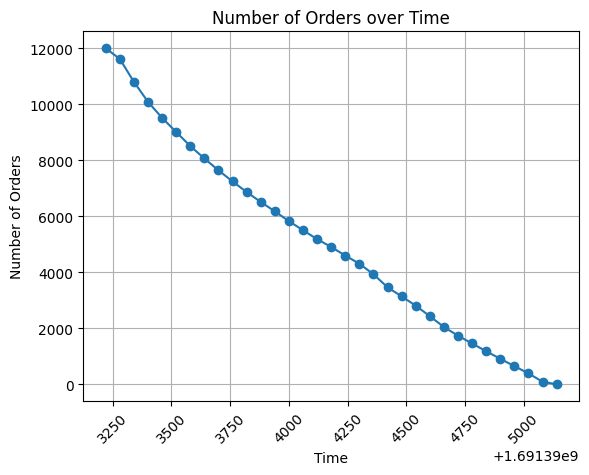

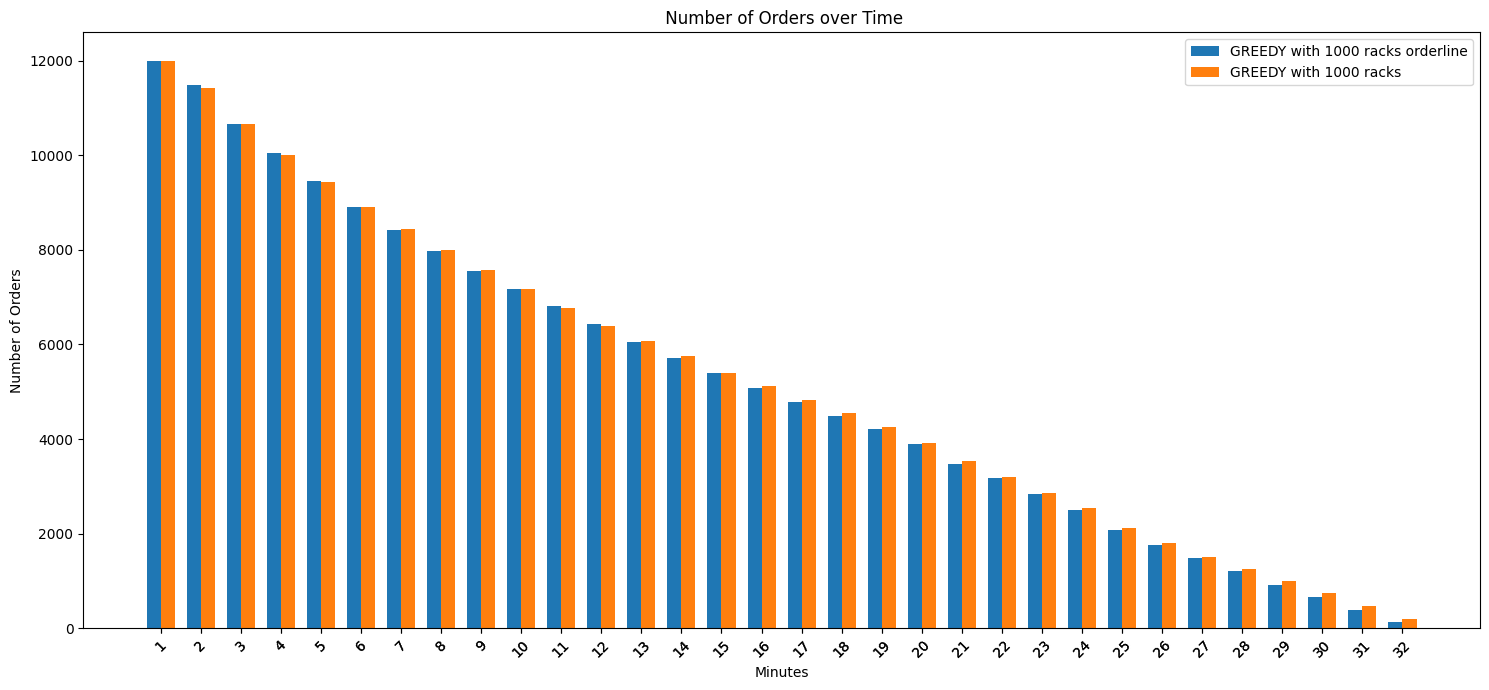

In [40]:
import matplotlib.pyplot as plt
import numpy as np
data_original = """1691480580,12000,0,0
1691480640,11495,0,0
1691480700,10657,0,0
1691480760,10058,0,0
1691480820,9455,0,0
1691480880,8912,0,0
1691480940,8426,0,0
1691481000,7973,0,0
1691481060,7561,0,0
1691481120,7164,0,0
1691481180,6808,0,0
1691481240,6423,0,0
1691481300,6046,0,0
1691481360,5714,0,0
1691481420,5394,0,0
1691481480,5071,0,0
1691481540,4775,0,0
1691481600,4489,0,0
1691481660,4211,0,0
1691481720,3899,0,0
1691481780,3481,0,0
1691481840,3168,0,0
1691481900,2839,0,0
1691482320,2503,0,0
1691482380,2079,0,0
1691482440,1765,0,0
1691482500,1487,0,0
1691482560,1211,0,0
1691482620,921,0,0
1691482680,651,0,0
1691482740,393,0,0
1691482800,139,0,0"""

# data_greedy = """1691395800,12000,0,0    1
# 1691395860,11279,0,0    2
# 1691395920,10508,0,0    3
# 1691395980,9948,0,0      4
# 1691396040,9348,0,0      5
# 1691396100,8817,0,0     6
# 1691396160,8364,0,0     7
# 1691396220,7894,0,0     8
# 1691396280,7470,0,0     9
# 1691396340,7052,0,0     10
# 1691396400,6683,0,0     11
# 1691396460,6333,0,0     12
# 1691396520,5973,0,0     13
# 1691396580,5650,0,0     14
# 1691396640,5350,0,0     15
# 1691396700,5057,0,0     16
# 1691396760,4732,0,0     17
# 1691396820,4431,0,0     18
# 1691396880,4146,0,0      19
# 1691396940,3824,0,0     20
# 1691397000,3422,0,0     21
# 1691397060,3125,0,0     22
# 1691397120,2786,0,0     23
# 1691397180,2446,0,0    24
# 1691397240,2040,0,0     25
# 1691397300,1732,0,0     26
# 1691397360,1457,0,0     27
# 1691397420,1185,0,0     28
# 1691397480,931,0,0      29
# 1691397540,662,0,0      30
# 1691397600,399,0,0      31
# 1691397660,128,0,0      32"""


data_greedy = """1691398440,12000,0,0
1691398500,11431,0,0
1691398560,10668,0,0
1691398620,10017,0,0
1691398680,9446,0,0
1691398740,8904,0,0
1691398800,8440,0,0
1691398860,8001,0,0
1691398920,7566,0,0
1691398980,7164,0,0
1691399040,6766,0,0
1691399100,6398,0,0
1691399160,6069,0,0
1691399220,5749,0,0
1691399280,5402,0,0
1691399340,5115,0,0
1691399400,4817,0,0
1691399460,4546,0,0
1691399520,4247,0,0
1691399580,3916,0,0
1691399640,3535,0,0
1691399700,3206,0,0
1691399760,2865,0,0
1691399820,2533,0,0
1691399880,2117,0,0
1691399940,1795,0,0
1691400000,1514,0,0
1691400060,1254,0,0
1691400120,1009,0,0
1691400180,751,0,0
1691400240,462,0,0
1691400300,198,0,0
"""


def parse_data(data):
    lines = data.split("\n")
    y_values = []

    for line in lines:
        parts = line.split(",")
        if len(parts) >= 2:
            y_values.append(int(parts[1]))  # Use the second column as y value (number of orders)
    
    return y_values

y_values_original = parse_data(data_original)
y_values_greedy = parse_data(data_greedy)

# Calculate the first difference of the y values
diff_values_original = [abs(y_values_original[i] - y_values_original[i-1]) for i in range(1, len(y_values_original))]
diff_values_greedy = [abs(y_values_greedy[i] - y_values_greedy[i-1]) for i in range(1, len(y_values_greedy))]

x_values_original = np.array(range(1, len(y_values_original) + 1))
x_values_greedy = np.array(range(1, len(y_values_greedy) + 1))

bar_width = 0.35


plt.figure(figsize=(15,7))
plt.bar(x_values_original - bar_width/2, y_values_original, bar_width, label='GREEDY with 1000 racks orderline')
plt.bar(x_values_greedy + bar_width/2, y_values_greedy, bar_width, label='GREEDY with 1000 racks')

plt.xlabel('Minutes')
plt.ylabel('Number of Orders')
plt.title(' Number of Orders over Time')
plt.xticks(np.concatenate((x_values_original, x_values_greedy)), rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


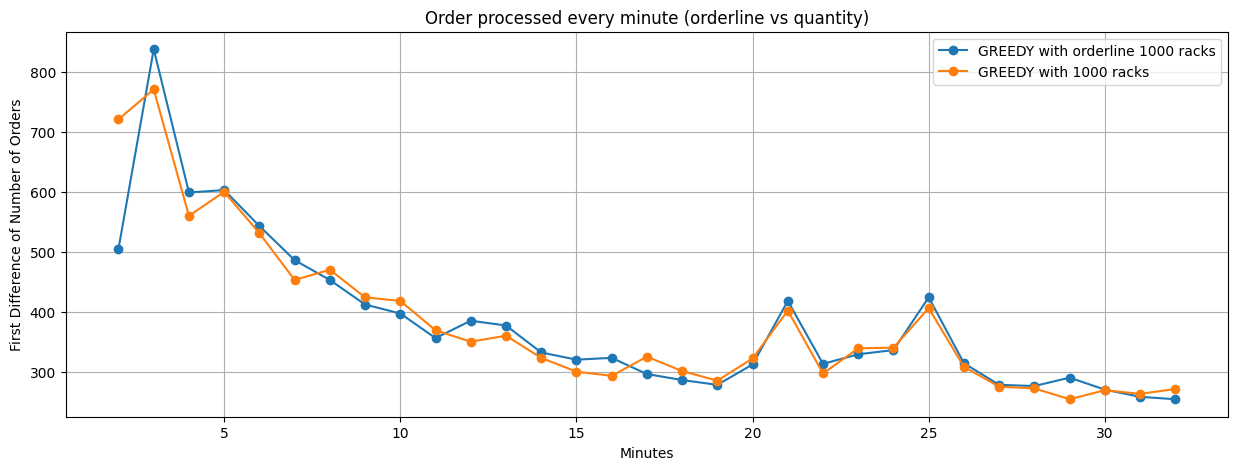

In [43]:
import matplotlib.pyplot as plt


# data_original = """ 1691393220,12000,0,0    1  
# 1691393280,11619,0,0    2
# 1691393340,10802,0,0    3 
# 1691393400,10087,0,0	4
# 1691393460,9516,0,0	5	
# 1691393520,9011,0,0	6
# 1691393580,8509,0,0	7
# 1691393640,8065,0,0	8
# 1691393700,7643,0,0	9
# 1691393760,7245,0,0	10
# 1691393820,6866,0,0	11
# 1691393880,6514,0,0	12
# 1691393940,6176,0,0	13
# 1691394000,5826,0,0	14
# 1691394060,5501,0,0	15
# 1691394120,5184,0,0	16
# 1691394180,4904,0,0	17
# 1691394240,4598,0,0	18
# 1691394300,4306,0,0	19
# 1691394360,3931,0,0	20
# 1691394420,3464,0,0	21
# 1691394480,3140,0,0	22
# 1691394540,2808,0,0	23
# 1691394600,2433,0,0	24
# 1691394660,2045,0,0	25
# 1691394720,1735,0,0	26
# 1691394780,1457,0,0	27
# 1691394840,1180,0,0	28
# 1691394900,911,0,0	29
# 1691394960,649,0,0	30
# 1691395020,389,0,0	31	
# 1691395080,91,0,0	32"""

# data_original2="""1691405580,12000,0,0
# 1691405640,11576,0,0
# 1691405700,10775,0,0
# 1691405760,10060,0,0
# 1691405820,9483,0,0
# 1691405880,8944,0,0
# 1691405940,8450,0,0
# 1691406000,8030,0,0
# 1691406060,7612,0,0
# 1691406120,7231,0,0
# 1691406180,6860,0,0
# 1691406240,6478,0,0
# 1691406300,6135,0,0
# 1691406360,5820,0,0
# 1691406420,5507,0,0
# 1691406480,5213,0,0
# 1691406540,4900,0,0
# 1691406600,4610,0,0
# 1691406660,4305,0,0
# 1691406720,3936,0,0
# 1691406780,3488,0,0
# 1691406840,3158,0,0
# 1691406900,2841,0,0
# 1691406960,2472,0,0
# 1691407020,2064,0,0
# 1691407080,1760,0,0
# 1691407140,1492,0,0
# 1691407200,1225,0,0
# 1691407260,931,0,0
# 1691407320,658,0,0
# 1691407380,404,0,0
# 1691407440,130,0,0
# """
data_original = """1691480580,12000,0,0
1691480640,11495,0,0
1691480700,10657,0,0
1691480760,10058,0,0
1691480820,9455,0,0
1691480880,8912,0,0
1691480940,8426,0,0
1691481000,7973,0,0
1691481060,7561,0,0
1691481120,7164,0,0
1691481180,6808,0,0
1691481240,6423,0,0
1691481300,6046,0,0
1691481360,5714,0,0
1691481420,5394,0,0
1691481480,5071,0,0
1691481540,4775,0,0
1691481600,4489,0,0
1691481660,4211,0,0
1691481720,3899,0,0
1691481780,3481,0,0
1691481840,3168,0,0
1691481900,2839,0,0
1691482320,2503,0,0
1691482380,2079,0,0
1691482440,1765,0,0
1691482500,1487,0,0
1691482560,1211,0,0
1691482620,921,0,0
1691482680,651,0,0
1691482740,393,0,0
1691482800,139,0,0"""
data_greedy = """1691395800,12000,0,0    1
1691395860,11279,0,0    2
1691395920,10508,0,0    3
1691395980,9948,0,0      4
1691396040,9348,0,0      5
1691396100,8817,0,0     6
1691396160,8364,0,0     7
1691396220,7894,0,0     8
1691396280,7470,0,0     9
1691396340,7052,0,0     10
1691396400,6683,0,0     11
1691396460,6333,0,0     12
1691396520,5973,0,0     13
1691396580,5650,0,0     14
1691396640,5350,0,0     15
1691396700,5057,0,0     16
1691396760,4732,0,0     17
1691396820,4431,0,0     18
1691396880,4146,0,0      19
1691396940,3824,0,0     20
1691397000,3422,0,0     21
1691397060,3125,0,0     22
1691397120,2786,0,0     23
1691397180,2446,0,0    24
1691397240,2040,0,0     25
1691397300,1732,0,0     26
1691397360,1457,0,0     27
1691397420,1185,0,0     28
1691397480,931,0,0      29
1691397540,662,0,0      30
1691397600,399,0,0      31
1691397660,128,0,0      32"""


def parse_data(data):
    lines = data.split("\n")
    y_values = []

    for line in lines:
        parts = line.split(",")
        if len(parts) >= 2:
            y_values.append(int(parts[1]))  # Use the second column as y value (number of orders)
    
    return y_values

y_values_original = parse_data(data_original)
y_values_greedy = parse_data(data_greedy)
y_values_original2= parse_data(data_original2)

[]
# Calculate the first difference of the y values
diff_values_original = [abs(y_values_original[i] - y_values_original[i-1]) for i in range(1, len(y_values_original))]
diff_values_greedy = [abs(y_values_greedy[i] - y_values_greedy[i-1]) for i in range(1, len(y_values_greedy))]
diff_values_original2 = [abs(y_values_original2[i] - y_values_original2[i-1]) for i in range(1, len(y_values_original2))]

x_values_original = list(range(2, len(y_values_original) + 1))
x_values_greedy = list(range(2, len(y_values_greedy) + 1))
x_values_original2 = list(range(2, len(y_values_original2) + 1))



plt.figure(figsize=(15,5))
plt.plot(x_values_original, diff_values_original, marker='o', label='GREEDY with orderline 1000 racks')
plt.plot(x_values_greedy, diff_values_greedy, marker='o', label='GREEDY with 1000 racks')
# plt.plot(x_values_original2, diff_values_original2, marker='o', label='Original2')

plt.xlabel('Minutes')
plt.ylabel('First Difference of Number of Orders')
plt.title('Order processed every minute (orderline vs quantity)')
plt.grid(True)
plt.legend()
plt.show()








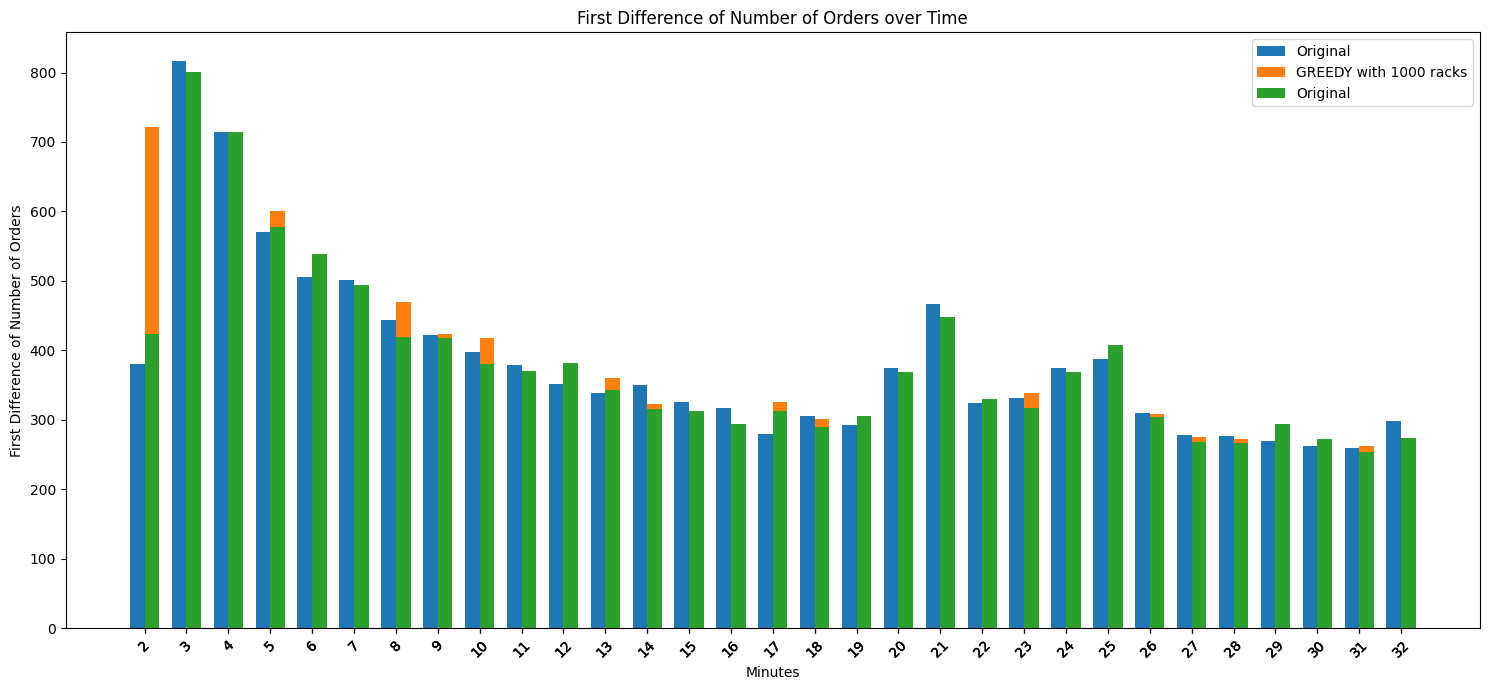

In [37]:



import matplotlib.pyplot as plt
import numpy as np

data_original = """ 1691393220,12000,0,0    1  
1691393280,11619,0,0    2
1691393340,10802,0,0    3 
1691393400,10087,0,0	4
1691393460,9516,0,0	5	
1691393520,9011,0,0	6
1691393580,8509,0,0	7
1691393640,8065,0,0	8
1691393700,7643,0,0	9
1691393760,7245,0,0	10
1691393820,6866,0,0	11
1691393880,6514,0,0	12
1691393940,6176,0,0	13
1691394000,5826,0,0	14
1691394060,5501,0,0	15
1691394120,5184,0,0	16
1691394180,4904,0,0	17
1691394240,4598,0,0	18
1691394300,4306,0,0	19
1691394360,3931,0,0	20
1691394420,3464,0,0	21
1691394480,3140,0,0	22
1691394540,2808,0,0	23
1691394600,2433,0,0	24
1691394660,2045,0,0	25
1691394720,1735,0,0	26
1691394780,1457,0,0	27
1691394840,1180,0,0	28
1691394900,911,0,0	29
1691394960,649,0,0	30
1691395020,389,0,0	31	
1691395080,91,0,0	32"""

data_greedy = """1691395800,12000,0,0    1
1691395860,11279,0,0    2
1691395920,10508,0,0    3
1691395980,9948,0,0      4
1691396040,9348,0,0      5
1691396100,8817,0,0     6
1691396160,8364,0,0     7
1691396220,7894,0,0     8
1691396280,7470,0,0     9
1691396340,7052,0,0     10
1691396400,6683,0,0     11
1691396460,6333,0,0     12
1691396520,5973,0,0     13
1691396580,5650,0,0     14
1691396640,5350,0,0     15
1691396700,5057,0,0     16
1691396760,4732,0,0     17
1691396820,4431,0,0     18
1691396880,4146,0,0      19
1691396940,3824,0,0     20
1691397000,3422,0,0     21
1691397060,3125,0,0     22
1691397120,2786,0,0     23
1691397180,2446,0,0    24
1691397240,2040,0,0     25
1691397300,1732,0,0     26
1691397360,1457,0,0     27
1691397420,1185,0,0     28
1691397480,931,0,0      29
1691397540,662,0,0      30
1691397600,399,0,0      31
1691397660,128,0,0      32"""

data_original2="""1691405580,12000,0,0
1691405640,11576,0,0
1691405700,10775,0,0
1691405760,10060,0,0
1691405820,9483,0,0
1691405880,8944,0,0
1691405940,8450,0,0
1691406000,8030,0,0
1691406060,7612,0,0
1691406120,7231,0,0
1691406180,6860,0,0
1691406240,6478,0,0
1691406300,6135,0,0
1691406360,5820,0,0
1691406420,5507,0,0
1691406480,5213,0,0
1691406540,4900,0,0
1691406600,4610,0,0
1691406660,4305,0,0
1691406720,3936,0,0
1691406780,3488,0,0
1691406840,3158,0,0
1691406900,2841,0,0
1691406960,2472,0,0
1691407020,2064,0,0
1691407080,1760,0,0
1691407140,1492,0,0
1691407200,1225,0,0
1691407260,931,0,0
1691407320,658,0,0
1691407380,404,0,0
1691407440,130,0,0
"""

def parse_data(data):
    lines = data.split("\n")
    y_values = []

    for line in lines:
        parts = line.split(",")
        if len(parts) >= 2:
            y_values.append(int(parts[1]))  # Use the second column as y value (number of orders)
    
    return y_values

y_values_original = parse_data(data_original)
y_values_greedy = parse_data(data_greedy)
y_values_original2 = parse_data(data_original2)


# Calculate the first difference of the y values
diff_values_original = [abs(y_values_original[i] - y_values_original[i-1]) for i in range(1, len(y_values_original))]
diff_values_greedy = [abs(y_values_greedy[i] - y_values_greedy[i-1]) for i in range(1, len(y_values_greedy))]
diff_values_original2 = [abs(y_values_original2[i] - y_values_original2[i-1]) for i in range(1, len(y_values_original2))]

x_values_original = np.array(range(2, len(y_values_original) + 1))
x_values_greedy = np.array(range(2, len(y_values_greedy) + 1))
x_values_original2 = np.array(range(2, len(y_values_original2) + 1))

bar_width = 0.35


plt.figure(figsize=(15,7))
plt.bar(x_values_original - bar_width/2, diff_values_original, bar_width, label='Original')
plt.bar(x_values_greedy + bar_width/2, diff_values_greedy, bar_width, label='GREEDY with 1000 racks')
plt.bar(x_values_original2 + bar_width/2, diff_values_original2, bar_width, label='Original')

plt.xlabel('Minutes')
plt.ylabel('First Difference of Number of Orders')
plt.title('First Difference of Number of Orders over Time')
plt.xticks(np.concatenate((x_values_original, x_values_greedy,x_values_original2)), rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
#====================================================  12000 CONSTANT ORDER POOL  ======================================================



















def parse_data(data):
    lines = data.split("\n")
    y_values = []

    for line in lines:
        parts = line.split(",")
        if len(parts) >= 2:
            y_values.append(int(parts[1]))  # Use the second column as y value (number of orders)
    
    return y_values

y_values_original = parse_data(data_original)
y_values_greedy = parse_data(data_greedy)
y_values_original2= parse_data(data_original2)


# Calculate the first difference of the y values
diff_values_original = [abs(y_values_original[i] - y_values_original[i-1]) for i in range(1, len(y_values_original))]
diff_values_greedy = [abs(y_values_greedy[i] - y_values_greedy[i-1]) for i in range(1, len(y_values_greedy))]
diff_values_original2 = [abs(y_values_original2[i] - y_values_original2[i-1]) for i in range(1, len(y_values_original2))]

x_values_original = list(range(2, len(y_values_original) + 1))
x_values_greedy = list(range(2, len(y_values_greedy) + 1))
x_values_original2 = list(range(2, len(y_values_original2) + 1))



plt.figure(figsize=(15,5))
plt.plot(x_values_original, diff_values_original, marker='o', label='GREEDY with orderline 1000 racks')
plt.plot(x_values_greedy, diff_values_greedy, marker='o', label='GREEDY with 1000 racks')
# plt.plot(x_values_original2, diff_values_original2, marker='o', label='Original2')

plt.xlabel('Minutes')
plt.ylabel('First Difference of Number of Orders')
plt.title('Order processed every minute (orderline vs quantity)')
plt.grid(True)
plt.legend()
plt.show() 